CS 418 Final Project
---
Using dataset scraped from Zillow
Includes all houses for sale in Chicago

data.csv is broken down into these columns...

| Address | Zip Code | Value | SQFT | Price Per SQFT | Number of Bedrooms | Number of Bathrooms | Number of Full Bathrooms | Year Built | Heating | Cooling | Parking | Type | Has Garage | Number of Storeis | HOA FEE |
|---------|----------|-------|------|----------------|--------------------|---------------------|--------------------------|------------|---------|---------|---------|------|------------|-------------------|---------|

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import math
import operator
%matplotlib inline

dfhouses = pd.read_csv('data.csv')
dfhouses.head()

,Address,Zip Code,Value,SQFT,Price Per SQFT,Number of Bedrooms,Number of Bathrooms,Number of Full Bathrooms,Year Built,Heating,Cooling,Parking,Type,Has Garage,Number of Stories,HOA Fee
0,4800 S Lake Park Ave APT 607,60615,35000.0,1175.0,30.0,2.0,1.0,1.0,1970.0,Forced air: Gas,Central,None,Condo,No,9.0,1177.0
1,232 N La Crosse Ave,60644,239900.0,2300.0,104.0,5.0,3.0,3.0,1885.0,Forced air: Gas,Central,Garage - Detached: Covered,Single Family,NaN,NaN,NaN
2,12043 S Wallace St,60628,7000.0,1970.0,4.0,7.0,3.0,3.0,1898.0,Gas,NaN,None,Multiple Occupancy,No,3.0,NaN
3,1511 S Kolin Ave #2,60623,55900.0,NaN,NaN,3.0,2.0,2.0,2006.0,Gas,Central,Covered,Condo,NaN,1.0,NaN
4,4938 S Drexel Blvd APT 114R,60615,209000.0,1218.0,172.0,2.0,2.0,1.0,1891.0,Forced air: Gas,Central,Garage: Covered,Condo,NaN,2.0,377.0


Best Zip Code for Price Per SQFT
---
Compares all the Price Per SQFT for each zip code

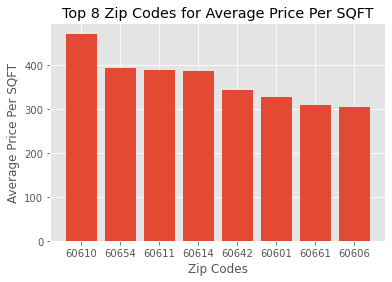

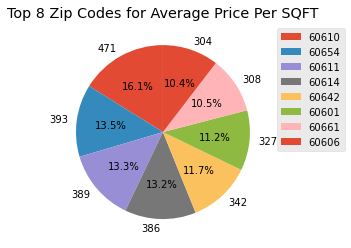

In [54]:
# Grab the zip code and price per sqft columns
df_zip_price_per_sqft = dfhouses.loc[:, ['Zip Code','Price Per SQFT']]

# Sort by ASC for price per sqft
df_zip_price_per_sqft = df_zip_price_per_sqft.sort_values(by = 'Price Per SQFT')

# Make a dictionary for each zip code and add to the total price per sqft
zip_dict = {}
zip_dict_count = {}

for i, row in df_zip_price_per_sqft.iterrows():
    (zip_code, price_per_sqft) = row
    if math.isnan(price_per_sqft):
        continue;
        
    
    # See if zip_code is in dictionary, add its price_per_sqft
    # Check for nans
    if zip_code in zip_dict:
        zip_dict[zip_code] += price_per_sqft
        zip_dict_count[zip_code] += 1
    else:
        zip_dict[zip_code] = price_per_sqft
        zip_dict_count[zip_code] = 1

# Make a new dictionary with the average values of Price Per SQFT
zip_dict_avg = {}

for key, val in zip_dict.items():
    zip_dict_avg[key] = int(val / zip_dict_count[key])
        
# Sort the dictionary
zip_dict_avg = dict(sorted(zip_dict_avg.items(), key=operator.itemgetter(1), reverse=True))
x_vals = np.array(list(zip_dict_avg.keys()), dtype="int")[:8]
y_vals = np.array(list(zip_dict_avg.values()), dtype="int")[:8]

# Plot the bar graph for the top 8
style.use('ggplot')
plt.bar(np.arange(len(x_vals)), y_vals, align='center')
plt.xticks(np.arange(len(x_vals)), x_vals)
plt.xlabel('Zip Codes')
plt.ylabel('Average Price Per SQFT')
plt.title('Top 8 Zip Codes for Average Price Per SQFT')

# Plot the pie graph for the top 8
fig1, ax1 = plt.subplots()
pie = ax1.pie(y_vals, labels=y_vals, autopct='%1.1f%%', shadow=False, startangle=90)
plt.legend(pie[0], x_vals, bbox_to_anchor = (1,1))
plt.title('Top 8 Zip Codes for Average Price Per SQFT')
plt.show()